In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dropout, Flatten,Activation
from tensorflow.keras import models, layers, optimizers, utils
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Dense


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import cv2
import os

from tqdm import tqdm

In [3]:
DATADIR1 = '/content/drive/MyDrive/MRI_Image/Testing'
DATADIR2= '/content/drive/MyDrive/MRI_Image/Training'
IMG_SIZE = 180
CATEGORIES = ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']

(236, 212, 3)


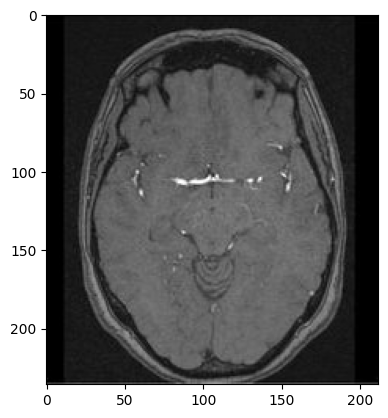

In [4]:
for category in CATEGORIES[2:]:
    path = os.path.join(DATADIR1, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))
        print(img_array.shape)
        plt.imshow(img_array)
        plt.show()

        break
    break

(512, 512, 3)


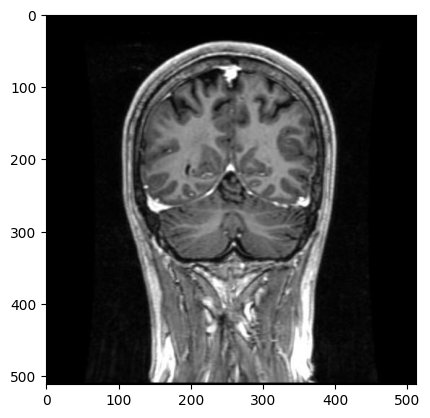

In [5]:
for category in CATEGORIES[2:]:
    path = os.path.join(DATADIR2, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))
        print(img_array.shape)
        plt.imshow(img_array)
        plt.show()

        break
    break

In [6]:
data_test = []

def create_data1():
    for category in CATEGORIES:
        path = os.path.join(DATADIR1, category)
        class_num = CATEGORIES.index(category)

        for img in tqdm(os.listdir(path)):
            try:
                img_array = cv2.imread(os.path.join(path,img))
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                data_test.append([new_array, class_num])
            except Exception as e:  # in the interest in keeping the output clean...
                pass


data_train = []

def create_data2():
    for category in CATEGORIES:
        path = os.path.join(DATADIR2, category)
        class_num = CATEGORIES.index(category)

        for img in tqdm(os.listdir(path)):
            try:
                img_array = cv2.imread(os.path.join(path,img))
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                data_train.append([new_array, class_num])
            except Exception as e:  # in the interest in keeping the output clean...
                pass

create_data1()
create_data2()

print("\n\n length of testing data : ", len(data_test) , "\n")
print("\n\n length of training data : ", len(data_train) , "\n")

100%|██████████| 827/827 [00:19<00:00, 42.60it/s] 



 length of testing data :  394 



 length of training data :  2870 



In [7]:
np.shape(data_train)
np.shape(data_test)

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:2009: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


(394, 2)

In [8]:
X_test = []
y_test = []

for features,label in tqdm(data_test):
    X_test.append(features)
    y_test.append(label)


X_train = []
y_train = []

for features1,label1 in tqdm(data_train):
    X_train.append(features1)
    y_train.append(label1)

100%|██████████| 2870/2870 [00:00<00:00, 1290485.90it/s]


In [9]:
print(np.shape(X_train), np.shape(y_train))
print(np.shape(X_test), np.shape(y_test))

(2870, 180, 180, 3) (2870,)
(394, 180, 180, 3) (394,)


In [10]:
X_train= np.array(X_train)
X_train = X_train.astype('float32') / 255

X_test= np.array(X_test)
X_test = X_test.astype('float32') / 255


y_train= np.array(y_train)
y_test = np.array(y_test)

In [11]:
print(np.shape(X_train), np.shape(y_train))
print(np.shape(X_test), np.shape(y_test))

(2870, 180, 180, 3) (2870,)
(394, 180, 180, 3) (394,)


In [12]:
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',
                 activation ='relu', input_shape = (IMG_SIZE, IMG_SIZE, 3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Conv2D(filters =96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Conv2D(filters = 96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(4, activation = "softmax"))
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 180, 180, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 96)        55392     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 22, 22, 96)       0

In [14]:
history = model.fit(X_train, y_train, epochs=20,validation_data=(X_test, y_test))

Epoch 1/20
90/90 [==============================] - 18s 55ms/step - loss: 0.9480 - accuracy: 0.5763 - val_loss: 2.0706 - val_accuracy: 0.3706
Epoch 2/20
90/90 [==============================] - 4s 40ms/step - loss: 0.5475 - accuracy: 0.7794 - val_loss: 2.4226 - val_accuracy: 0.5711
Epoch 3/20
90/90 [==============================] - 4s 42ms/step - loss: 0.3473 - accuracy: 0.8620 - val_loss: 2.7787 - val_accuracy: 0.6421
Epoch 4/20
90/90 [==============================] - 3s 39ms/step - loss: 0.2368 - accuracy: 0.9111 - val_loss: 2.8357 - val_accuracy: 0.5964
Epoch 5/20
90/90 [==============================] - 4s 40ms/step - loss: 0.1576 - accuracy: 0.9415 - val_loss: 2.4583 - val_accuracy: 0.7132
Epoch 6/20
90/90 [==============================] - 4s 41ms/step - loss: 0.0914 - accuracy: 0.9707 - val_loss: 4.1963 - val_accuracy: 0.7284
Epoch 7/20
90/90 [==============================] - 4s 43ms/step - loss: 0.0591 - accuracy: 0.9808 - val_loss: 3.6264 - val_accuracy: 0.7335
Epoch 8/20
9

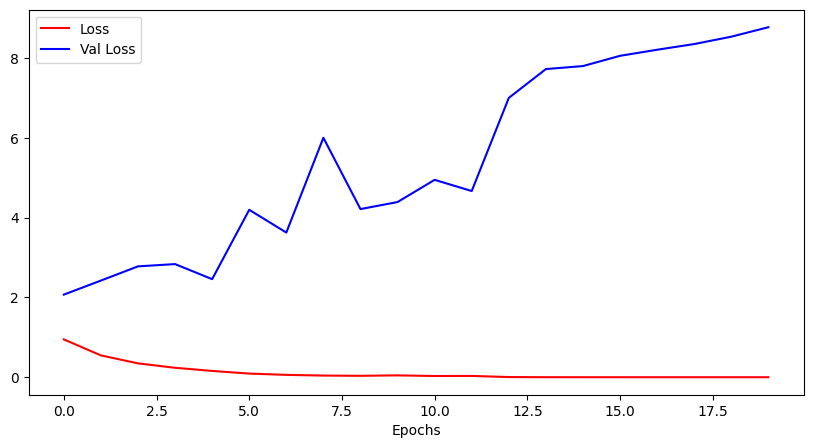

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(history.history["loss"], label = "Loss", color = "r")
plt.plot(history.history["val_loss"], label = "Val Loss", color = "b")
plt.xlabel("Epochs")
plt.legend()
plt.show()

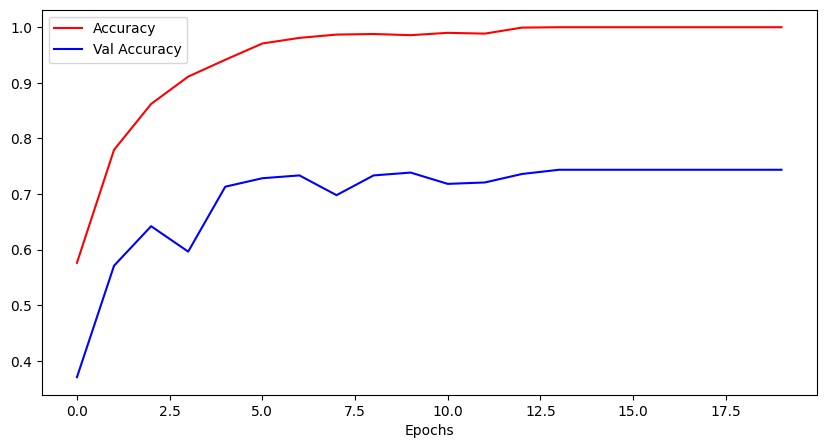

In [16]:
plt.figure(figsize=(10,5))
plt.plot(history.history["accuracy"], label="Accuracy", color = "r")
plt.plot(history.history["val_accuracy"], label="Val Accuracy", color = "b")
plt.xlabel("Epochs")
plt.legend()
plt.show()

In [17]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(test_loss,test_acc)

13/13 [==============================] - 0s 14ms/step - loss: 8.7732 - accuracy: 0.7437
8.773173332214355 0.7436548471450806


In [29]:
# import joblib
# joblib.dump(model , 'MRI-Brainclassification')

model.save('model.h5')

In [30]:
model= tf.keras.models.load_model('model.h5')